In [1]:
import pandas as pd
import pickle

In [2]:
df=pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [31]:
df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [4]:
X=df.drop('target',axis=1)

In [5]:
X.head()


,id,keyword,location,text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...


In [6]:
y=df['target']

In [7]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [8]:
df.shape

(7613, 5)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [10]:
messages=df.copy()

In [11]:
messages.reset_index(inplace=True)

In [12]:
messages.head(10)

,index,id,keyword,location,text,target
0,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [13]:
messages['text'][6]

'#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas'

In [14]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [15]:
corpus[3]

'peopl receiv wildfir evacu order california'

In [16]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()
pickle.dump(tfidf_v, open('tranform.pkl', 'wb'))

In [17]:
X.shape

(7613, 5000)

In [18]:
y=messages['target']

In [19]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [20]:
tfidf_v.get_feature_names()[:20]

C:\Users\Anubhav\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'ab',
 'aba',
 'aba woman',
 'aba woman deliv',
 'abandon',
 'abandon aircraft',
 'abandon aircraft mma',
 'abc',
 'abc news',
 'abc news http',
 'abcnew',
 'abl',
 'ablaz',
 'ablaz http',
 'ablaz http co',
 'absolut',
 'abstorm',
 'abus',
 'ac']

In [21]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [22]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())

In [23]:
count_df.head()

,aa,ab,aba,aba woman,aba woman deliv,abandon,abandon aircraft,abandon aircraft mma,abc,abc news,...,za,zionist,zionist terrorist,zl,zo,zombi,zombi apocalyps,zone,zx,zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
import matplotlib.pyplot as plt

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### MultinomialNB Algorithm

In [26]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB(alpha=0.1)

In [27]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.804
Confusion matrix, without normalization


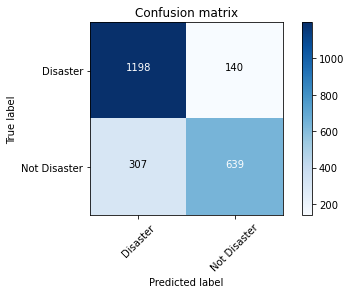

In [28]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Disaster', 'Not Disaster'])

In [29]:
import pickle
# Creating a pickle file for the classifier
filename = 'disaster_classification.pkl'
pickle.dump(classifier, open(filename, 'wb'))